# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern

### Anup Singh

### Task 1: Prediction using Supervised ML

In [4]:
# Importing the Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Import the Data
data = pd.read_csv("http://bit.ly/w-data")

In [6]:
#Printing the first five records of the Data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
#Printing the last five records of the data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
#Explore the Dataset
print(data.shape)

(25, 2)


In [9]:
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Data Visualization

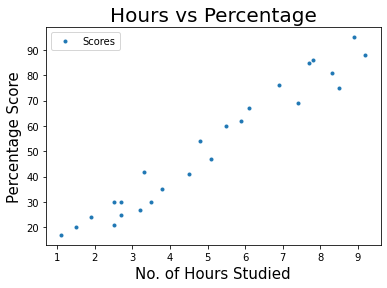

In [11]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='.')  
plt.title('Hours vs Percentage',fontsize=20)  
plt.xlabel('No. of Hours Studied',fontsize=15)  
plt.ylabel('Percentage Score',fontsize=15)  
plt.show()

In [12]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## Linear Regression

In [14]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,train_size=0.80,test_size=0.20,random_state=0)

print("Splitting of data into Training and Testing is Completed")

Splitting of data into Training and Testing is Completed


#### Training the Model

In [15]:
from sklearn.linear_model import LinearRegression
linearreg=LinearRegression()

In [16]:
##Fitting the Training Data
linearreg.fit(X_train,Y_train)

print("Training is Completed")

Training is Completed


#### Plotting the Regression Line

In [17]:
line = linearreg.coef_*X+linearreg.intercept_

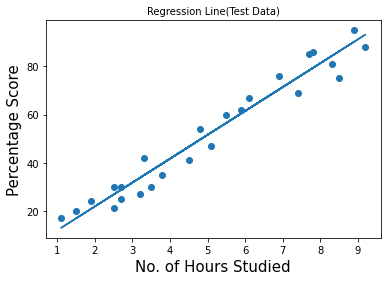

In [18]:
# Plotting the regression line
line = linearreg.coef_*X+linearreg.intercept_
plt.scatter(X, Y)
plt.plot(X, line);
plt.title('Regression Line(Test Data)',fontsize=10)  
plt.xlabel('No. of Hours Studied',fontsize=15)  
plt.ylabel('Percentage Score',fontsize=15) 

plt.show()

### Test Data

In [19]:
##predicting the Scores for test data
Y_pred=linearreg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [20]:
Y_test

array([20, 27, 69, 30, 62])

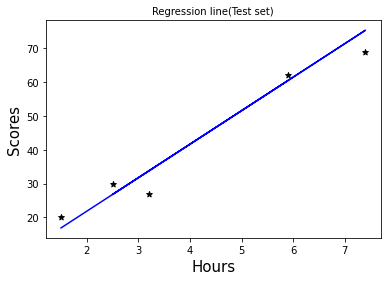

In [21]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='blue')
plt.scatter(X_test,Y_test,color='black',marker='*')
plt.title("Regression line(Test set)",fontsize=10)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.show()

### Comparing Actual VS Predicted

In [22]:
data= pd.DataFrame({'Actual': Y_test,'Predicted': Y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Accuracy of the Model

In [23]:
##Goodness of fit Test
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105354

#### The accuracy of the Model is 94% that means the model is good model

### Error Prediction

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squ_error = mean_squared_error(Y_test, Y_pred)
mean_abs_error = mean_absolute_error(Y_test, Y_pred)
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 21.598769307217456
Mean absolute Error: 4.183859899002982


## Predicting the Score

In [25]:
#Let's predict the score for 9.25 hours/day
print('Score of student who study for 9.25 hours per day : ', linearreg.predict([[9.25]]))

Score of student who study for 9.25 hours per day :  [93.69173249]


#### **So if the Student studies for 9.25 hours/day then he can score 93.69 marks**